In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#pip install cv2
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import numpy as np 
# import pandas as pd
import matplotlib.pyplot as plt
#import sys
#!pip install opencv-python
import cv2
import os 
# from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import pickle
from sklearn import metrics



In [7]:
train = "D:/Downloads/archive/New Plant Diseases Dataset(Augmented)/train"
test = "D:/Downloads/archive/New Plant Diseases Dataset(Augmented)/valid"
image_size=128

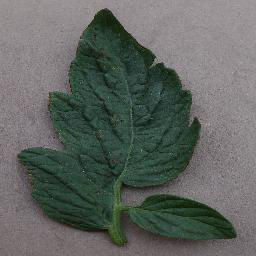

In [8]:
Image.open("D:/Downloads/archive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")


In [9]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
# 	if imutils.is_cv2():
# 		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
# 	else:
	cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

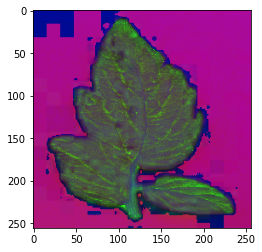

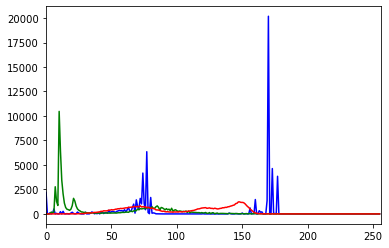

In [10]:

#reading the image whose histogram is to be calculated
imgread = cv2.imread('D:/Downloads/archive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
#specifying the colors which are iterated to be passed as values of colors to the calcHist() function to calculate the histogram of an image and plot the histogram of an image
color = ('b','g','r')
hsv = cv2.cvtColor(imgread, cv2.COLOR_BGR2HSV)
imgplot = plt.imshow(hsv)
plt.show()

for k,color in enumerate(color):
    histogram = cv2.calcHist([hsv],[k],None,[256],[0,256])
    plt.plot(histogram,color = color)
plt.xlim([0,256])
plt.show()

In [11]:

def train_data():
    np_img = []
    for directory in tqdm(os.listdir(train)): 
        directory_path = os.path.join(train, directory)
        for image in os.listdir(directory_path):
            path = os.path.join(directory_path, image)
            img = cv2.imread(path) 
            img = cv2.resize(img, (image_size, image_size))
            img = extract_color_histogram(img)
            np_img.append(img)
    return np_img
def test_data():
    np_img = []
    for directory in tqdm(os.listdir(test)): 
        directory_path = os.path.join(test, directory)
        for image in os.listdir(directory_path):
            path = os.path.join(directory_path, image)
            img = cv2.imread(path) 
            img = cv2.resize(img, (image_size, image_size))
            img = extract_color_histogram(img)
            np_img.append(img)
    return np_img




In [12]:
def train_output():
    i = []
    ans = 0
    it = 0
    for directory in os.listdir(train): 
        directory_path = os.path.join(train, directory)
        cur = np.ones((len(os.listdir(directory_path)), 1))*it
        i = np.append(i, cur)
        ans+=len(os.listdir(directory_path))
        it+=1
    return i
def test_output():
    i = []
    ans = 0
    it = 0
    for directory in os.listdir(test): 
        directory_path = os.path.join(test, directory)
        cur = np.ones((len(os.listdir(directory_path)), 1))*it
        i = np.append(i, cur)
        ans+=len(os.listdir(directory_path))
        it+=1
    return i

In [13]:
x_train = train_data() 
x_test = test_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]


In [14]:
x_train = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
x_test = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test))

In [15]:
y_train = train_output()
y_test = test_output()

In [16]:
x_data=np.concatenate((x_train,x_test),axis=0)

y_data=np.concatenate((y_train,y_test),axis=0).reshape(x_data.shape[0],1)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
x_train.shape
y_train.shape

(19490, 1)

In [18]:
# logistic_regression(x_train.T, y_train, x_test.T, y_test,learning_rate = 0.01, num_iterations = 1500)
from sklearn import linear_model
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train.ravel())

LogisticRegression(multi_class='ovr', solver='liblinear')

In [19]:
lm.score(x_test, y_test.ravel())

0.8476744186046512

In [20]:
import pickle
filename = 'logisitcRegrssion.sav'
pickle.dump(lm, open(filename, 'wb'))

In [21]:
print('Predicted value is =', lm.predict([x_test[2000]]))

print('Actual value from test data is %s and corresponding image is as below' % (y_test.ravel()[2000]) )

Predicted value is = [0.]
Actual value from test data is 9.0 and corresponding image is as below


array([[256,   5,   3,   5,   2,   0,   1,   1,   0,  18],
       [ 16, 309,   3,  14,   7,  13,   7,  28,   1,   6],
       [  0,   0, 343,   8,   1,   0,   9,   5,   2,   1],
       [  8,  30,  19, 248,  12,   3,  21,   5,   4,   9],
       [  1,   4,   0,  14, 336,   4,   5,   1,   0,   1],
       [  0,   2,   1,   2,   2, 277,  11,   8,  18,   3],
       [  0,   6,   0,   3,   3,  12, 267,   8,   8,   6],
       [  1,   2,   7,   3,   1,   4,  18, 275,  10,   0],
       [  0,   0,   0,   0,   2,  11,   3,   5, 316,   0],
       [  9,   6,   0,   7,  13,   4,  22,   4,   2, 289]], dtype=int64)

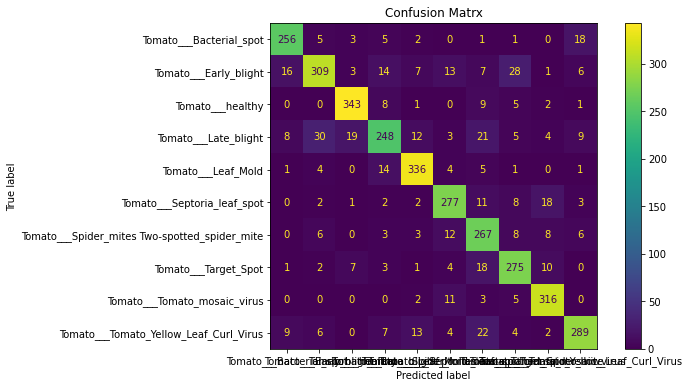

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, x_test, y_test.ravel(), display_labels=os.listdir(train), ax = ax)
disp.confusion_matrix

In [23]:
print(metrics.classification_report(y_test, lm.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       291
         1.0       0.85      0.76      0.80       404
         2.0       0.91      0.93      0.92       369
         3.0       0.82      0.69      0.75       359
         4.0       0.89      0.92      0.90       366
         5.0       0.84      0.85      0.85       324
         6.0       0.73      0.85      0.79       313
         7.0       0.81      0.86      0.83       321
         8.0       0.88      0.94      0.91       337
         9.0       0.87      0.81      0.84       356

    accuracy                           0.85      3440
   macro avg       0.85      0.85      0.85      3440
weighted avg       0.85      0.85      0.85      3440



In [24]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(loss="log", penalty="l2", max_iter=10)
SGD.fit(x_train, y_train.ravel())

SGDClassifier(loss='log', max_iter=10)

In [25]:
SGD.score(x_test, y_test.ravel())

0.8255813953488372

In [26]:
import pickle
filename = 'StochasticGradientDescent.sav'
pickle.dump(lm, open(filename, 'wb'))

In [27]:
print('Predicted value is =', SGD.predict([x_test[2000]]))

print('Actual value from test data is %s and corresponding image is as below' % (y_test.ravel()[2000]) )

Predicted value is = [0.]
Actual value from test data is 9.0 and corresponding image is as below


array([[250,   5,   4,   5,   3,   0,   1,   1,   0,  22],
       [ 19, 279,   3,  12,  11,  16,   5,  43,   1,  15],
       [  0,   0, 333,  10,   1,   0,  11,  12,   1,   1],
       [  6,  25,  20, 248,  16,   7,  16,   7,   3,  11],
       [  1,   3,   0,  17, 334,   5,   4,   1,   0,   1],
       [  0,   2,   1,   2,   6, 269,   9,  10,  22,   3],
       [  1,   6,   0,   7,   6,  15, 244,  18,   8,   8],
       [  1,   2,   7,   3,   5,   4,   8, 280,  11,   0],
       [  0,   0,   0,   0,   2,  11,   2,   7, 315,   0],
       [ 10,   6,   0,   7,  17,   4,  18,   4,   2, 288]], dtype=int64)

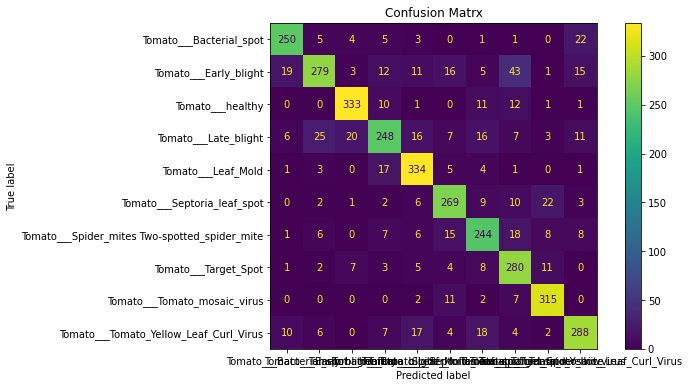

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(SGD, x_test, y_test.ravel(), display_labels=os.listdir(train), ax = ax)
disp.confusion_matrix

In [29]:
print(metrics.classification_report(y_test, SGD.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       291
         1.0       0.85      0.69      0.76       404
         2.0       0.90      0.90      0.90       369
         3.0       0.80      0.69      0.74       359
         4.0       0.83      0.91      0.87       366
         5.0       0.81      0.83      0.82       324
         6.0       0.77      0.78      0.77       313
         7.0       0.73      0.87      0.80       321
         8.0       0.87      0.93      0.90       337
         9.0       0.83      0.81      0.82       356

    accuracy                           0.83      3440
   macro avg       0.83      0.83      0.82      3440
weighted avg       0.83      0.83      0.82      3440



In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=40, random_state=0).fit(x_train)


In [31]:
kmeans.score(x_test)

-973.6826782226562

In [32]:
 from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(10,10), verbose=10, random_state=21,tol=0.000000001,max_iter=1000, )

                      
clf.fit(x_train, y_train.ravel())

Iteration 1, loss = 2.28468623
Iteration 2, loss = 1.96585890
Iteration 3, loss = 1.53868603
Iteration 4, loss = 1.21287043
Iteration 5, loss = 0.99684435
Iteration 6, loss = 0.84822364
Iteration 7, loss = 0.74297435
Iteration 8, loss = 0.66605513
Iteration 9, loss = 0.60743093
Iteration 10, loss = 0.56278492
Iteration 11, loss = 0.52774831
Iteration 12, loss = 0.49910002
Iteration 13, loss = 0.47530263
Iteration 14, loss = 0.45489774
Iteration 15, loss = 0.43752602
Iteration 16, loss = 0.42116669
Iteration 17, loss = 0.40692265
Iteration 18, loss = 0.39362219
Iteration 19, loss = 0.38228652
Iteration 20, loss = 0.37184097
Iteration 21, loss = 0.36113418
Iteration 22, loss = 0.35187872
Iteration 23, loss = 0.34299100
Iteration 24, loss = 0.33505415
Iteration 25, loss = 0.32749555
Iteration 26, loss = 0.32045966
Iteration 27, loss = 0.31410934
Iteration 28, loss = 0.30720422
Iteration 29, loss = 0.30158996
Iteration 30, loss = 0.29582058
Iteration 31, loss = 0.29058050
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=1000,
              random_state=21, tol=1e-09, verbose=10)

In [33]:
clf.score(x_test, y_test, sample_weight=None)

0.9566860465116279

In [34]:
import pickle
filename = 'MLPClassifier.sav'
pickle.dump(clf, open(filename, 'wb'))

In [35]:
print('Predicted value is =', SGD.predict([x_test[2000]]))

print('Actual value from test data is %s and corresponding image is as below' % (y_test.ravel()[2000]) )

Predicted value is = [0.]
Actual value from test data is 9.0 and corresponding image is as below


array([[250,   5,   4,   5,   3,   0,   1,   1,   0,  22],
       [ 19, 279,   3,  12,  11,  16,   5,  43,   1,  15],
       [  0,   0, 333,  10,   1,   0,  11,  12,   1,   1],
       [  6,  25,  20, 248,  16,   7,  16,   7,   3,  11],
       [  1,   3,   0,  17, 334,   5,   4,   1,   0,   1],
       [  0,   2,   1,   2,   6, 269,   9,  10,  22,   3],
       [  1,   6,   0,   7,   6,  15, 244,  18,   8,   8],
       [  1,   2,   7,   3,   5,   4,   8, 280,  11,   0],
       [  0,   0,   0,   0,   2,  11,   2,   7, 315,   0],
       [ 10,   6,   0,   7,  17,   4,  18,   4,   2, 288]], dtype=int64)

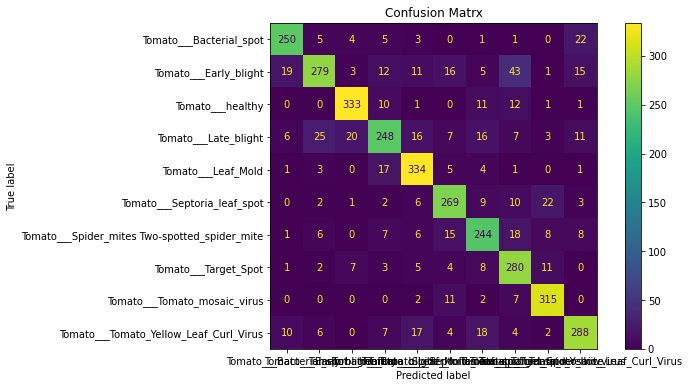

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(SGD, x_test, y_test.ravel(), display_labels=os.listdir(train), ax = ax)
disp.confusion_matrix